# Iris 데이터를 이용한 SVM 커널 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [3]:
data = data[target != 0, :2]
target = target[target != 0]

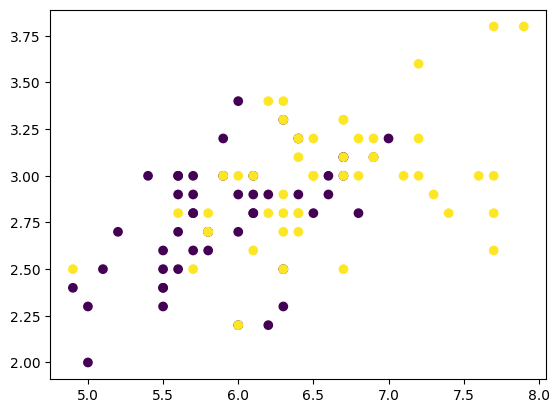

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=2021
)

## 2. Linear Kernel

SVM은 `sklearn.svm`의 `SVC`로 사용할 수 있음

In [7]:
from sklearn.svm import SVC

가장 기본적인 svm 커널인 linear 커널을 사용해보기

In [8]:
linear_svc = SVC(kernel="linear")

In [9]:
linear_svc.fit(train_data, train_target)

SVC(kernel='linear')

svm 결과를 시각화 하기 위한 함수

In [17]:
def plot_support_vector_machine(svm):
  # 전체 데이터
  plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)

  # test 데이터
  plt.scatter(test_data[:, 0], test_data[:, 1], s=80, facecolors='none', zorder=10, edgecolor='k')

  plt.axis('tight')
  x_min = data[:, 0].min()
  x_max = data[:, 0].max()
  y_min = data[:, 1].min()
  y_max = data[:, 1].max()

  # 영역 칠하기
  XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
  Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

아래 plt의 속성들은 다음과 같음
- decision boundary
   - 검은색 직선
- support vector
  - 검은색 점선
- 영역
  클래스로 구별되는 영역

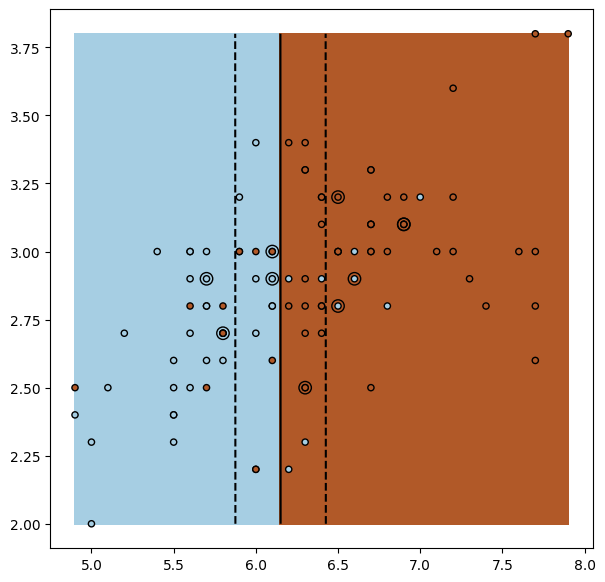

In [18]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(linear_svc)

## 3. Poly Kernel

다음으로 알아볼 커널은 ploy 커널  
ploy 커널은 직선을 곡선으로 mapping 시켜주는 커널임  
ploy 커널에 영향을 미치는 argument들은 다음과 같음  
- gamma
  - 결정 경계를 스케일링해주는 값
- degree
  - 몇 차원의 곡선으로 맵핑할지 정해주는 값

### 3.1 gamma
#### 3.1.1 "scale"
default 옵션은 자동으로 scaling을 해줌  |

In [21]:
poly_svc = SVC(kernel="poly")

In [22]:
poly_svc.fit(train_data, train_target)

SVC(kernel='poly')

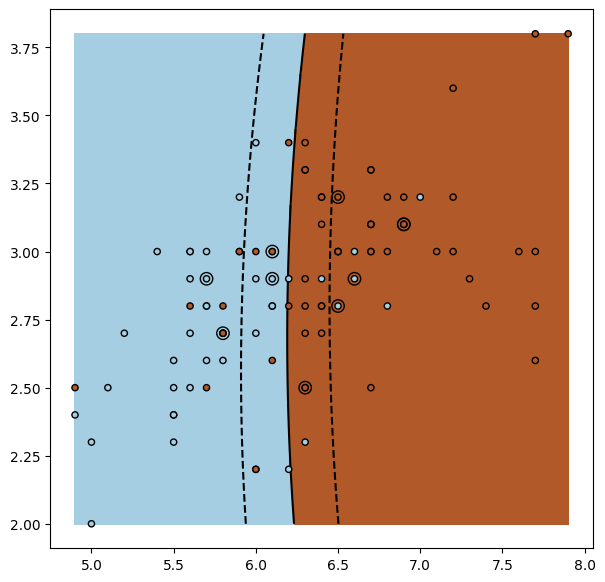

In [24]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

#### 3.1.2 gamma=0.1

gamma 값을 작게 주면 다음과 같음

In [25]:
poly_svc = SVC(kernel="poly", gamma=0.1)
poly_svc.fit(train_data, train_target)

SVC(gamma=0.1, kernel='poly')

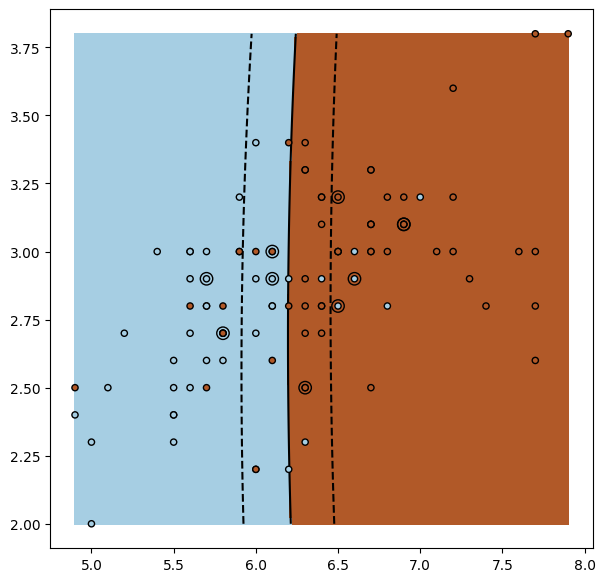

In [26]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

#### 3.1.3 gamma=10

gamma 값을 크게 주면 다음과 같음

In [27]:
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

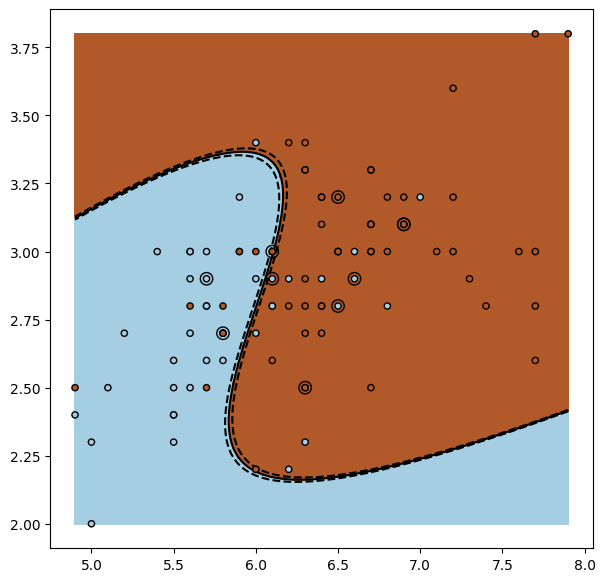

In [28]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

### 3.2 degree

#### 3.2.1 degree=2

In [29]:
poly_svc = SVC(kernel="poly", gamma=10, degree=2)
poly_svc.fit(train_data, train_target)

SVC(degree=2, gamma=10, kernel='poly')

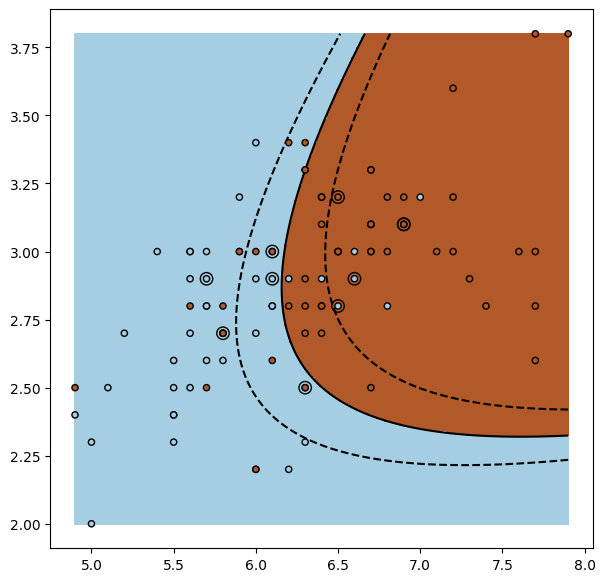

In [30]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

#### 3.2.1 degree=4

In [31]:
poly_svc = SVC(kernel="poly", gamma=10, degree=4)
poly_svc.fit(train_data, train_target)

SVC(degree=4, gamma=10, kernel='poly')

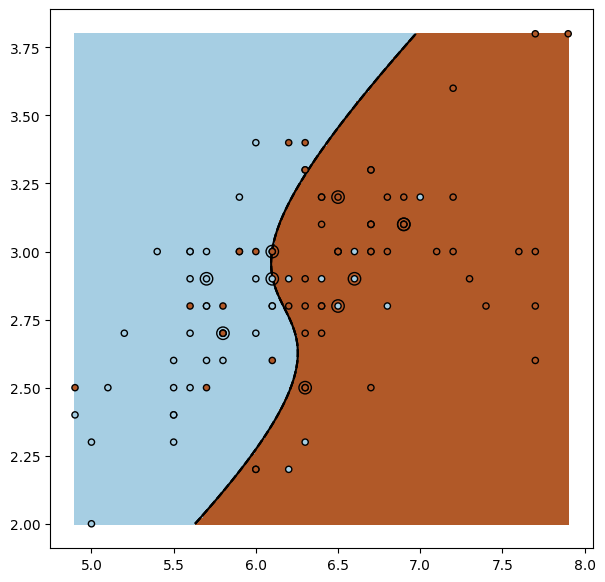

In [32]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

## 4. RBF Kernel
다음으로 알아볼 것은 RBF 커널입니다.  
RBF 커널은 데이터를 고차원의 공간으로 mapping 시켜줍니다.  
RBF 또한 gamma 값으로 Scaling을 합니다.  

### 4.1 "scale"

In [33]:
rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(train_data, train_target)

SVC()

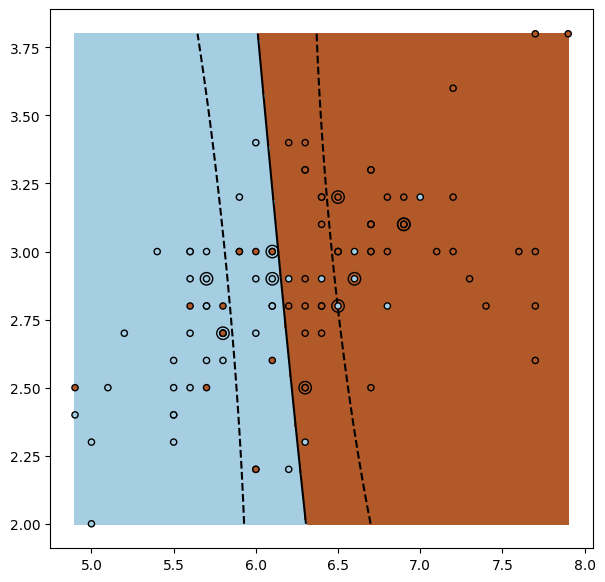

In [34]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

### 4.2 gamma=0.1

In [35]:
rbf_svc = SVC(kernel="rbf", gamma=0.1)
rbf_svc.fit(train_data, train_target)

SVC(gamma=0.1)

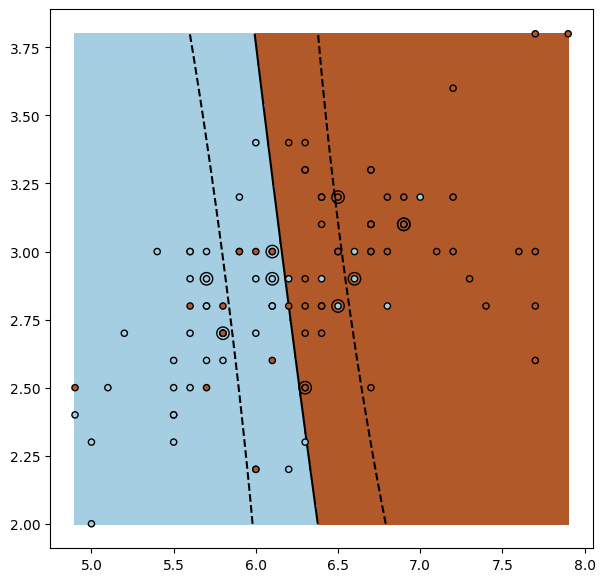

In [36]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

### 4.3 gamma=10

In [37]:
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

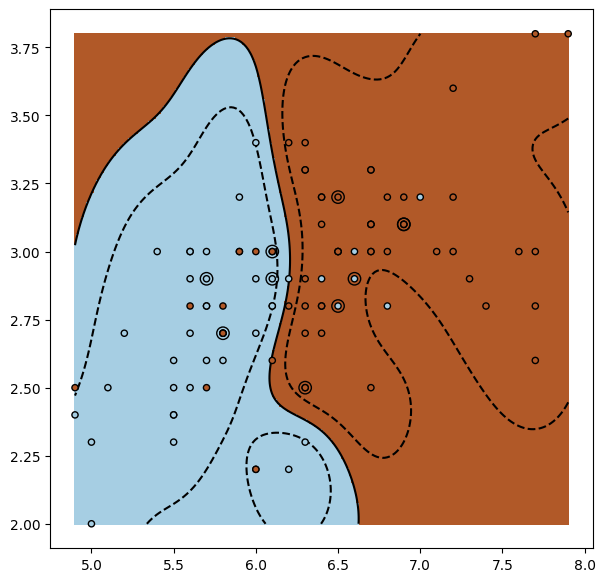

In [38]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

데이터를 3차원으로 맵핑한 후 hyperplane으로 데이터를 나누기 때문에 등고선이 생겼음을 확인할 수 있음

## 5. Penalty
penalty는 c argument를 통해 줄 수 있음

### 5.1 Poly

In [39]:
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

In [40]:
hard_penalty_poly_svc = SVC(kernel="poly", gamma=10, C=100)
hard_penalty_poly_svc.fit(train_data, train_target)

SVC(C=100, gamma=10, kernel='poly')

Text(0.5, 1.0, 'Hard Penalty')

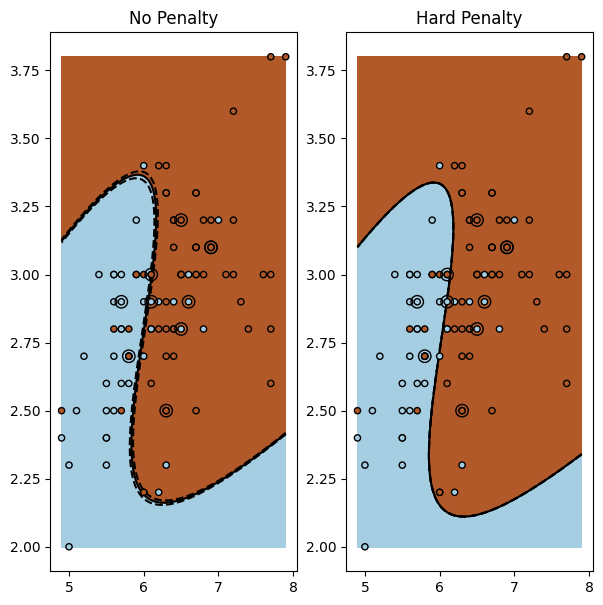

In [43]:
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plot_support_vector_machine(poly_svc)
plt.title("No Penalty")
plt.subplot(1, 2, 2)
plot_support_vector_machine(hard_penalty_poly_svc)
plt.title("Hard Penalty")

poly를 이용했을 때는 penalty를 주어도 Support vector가 먼지 가까운지 이외의 큰 차이는 없음  
그 이유는 poly는 이미 최대로 적합을 시킨 상태이기 때문에 Penalty를 더 적용하여 모델을 생성할 수 없기 때문

### 5.2 RBF

In [44]:
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

In [46]:
hard_penalty_svc = SVC(kernel="rbf", gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)

SVC(C=100, gamma=10)

Text(0.5, 1.0, 'Hard Penalty')

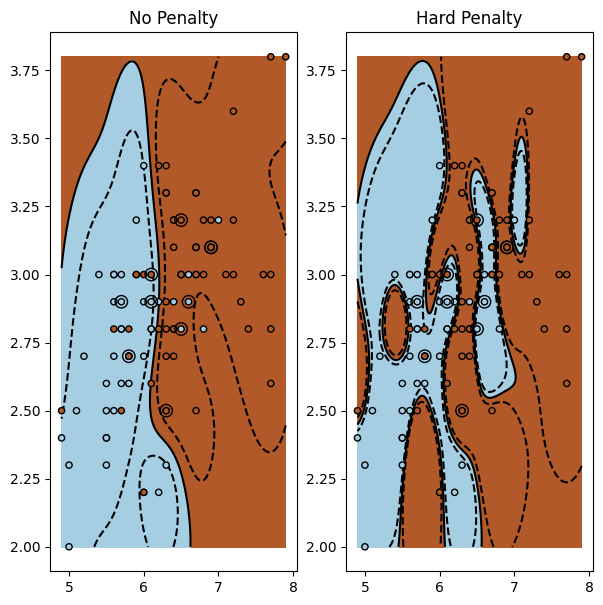

In [47]:
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plot_support_vector_machine(rbf_svc)
plt.title("No Penalty")
plt.subplot(1, 2, 2)
plot_support_vector_machine(hard_penalty_svc)
plt.title("Hard Penalty")

Hard Penalty의 경우 각 영역 내에 있는 다른 영역의 데이터까지 맞추기 위해 파랑 영역 내부의 갈색 영역, 갈색 영역 내의 파랑 영역 등이 있음을 확인할 수 있음  